## Gradient Descent
Gradient Descent is the one algorithm that is used in **almost every machine learning model**. There are a few variations of the algorithm but this, essentially, is how any ML model searches for the best function that represents the data in the training dataset (i.e. the function that has lowest possible cost/deviation).

Gradient descent is an optimization algorithm used to minimize the cost function and find the best-fit line for the model. The goal is to iteratively adjust the weights of the model to reduce the error. **Each iteration** updates the weights in the direction that **decreases the cost** function giving us optimal set of parameters.

### Derivative, Slope, Gradient
From our knowledge in Calculus we are expected to already know that the derivative of a function shows the **slope** of that function in a particular point. So, if we calculate the **derivative of the cost function** around specific point $x$, then we can conclude in which direction the cost function goes down (i.e. produce lower cost). In other words, the derivative of $J$ is the direction we choose (which slope we descend into). It calculates the direction and the slope. (the left or right slope - up or down).

<center><img src="img/gradient_descent_1.png" alt="Derivative of the cost function" width="600" height="363" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 1.</b> Cost function for our data</i></p>

So, if the cost function is:
$$ J = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

or for short we use $\hat{y}$ for the predicted value:

$$ J = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)})^2 $$


Then, in order to calculate the gradient (the movement up or down) for specific coefficients $w$ and $b$ we need to calculate two derivatives.

#### Derivative wrt to w
The derivative of the *cost function* $J(w, b)$ in respect to the input parameter $w$ :
$$ J'_w = \frac{d}{dw} J(w,b) $$
$$ = \frac{d}{dw} \left[ \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)})^2 \right] $$
Using the **Constant Multiple Rule** we extract $\frac{1}{m}$:
$$ = \frac{1}{m} \frac{d}{dw} \left[\sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)})^2 \right] $$

Now using the **Chain Rule** we come up with:

$$ = \frac{1}{m} \left[ \sum_{i=1}^{m} \left( \frac{d}{dw} (\hat{y}^{(i)}  - y^{(i)})^2 \right) \left( \frac{d}{dw}(\hat{y}^{(i)}  - y^{(i)}) \right) \right] $$

We calculate the first derivative and replace $\hat{y}$ with its linear representation $b + wx^{(i)}$:
$$ = \frac{1}{m} \left[ \sum_{i=1}^{m} 2(\hat{y}^{(i)}  - y^{(i)}) \left( \frac{d}{dw}(b + wx^{(i)} - y^{(i)}) \right) \right] $$

Now we apply the **Constant Rule**:
$$ = \frac{1}{m} \left[ \sum_{i=1}^{m} 2(\hat{y}^{(i)}  - y^{(i)}) \left( 0 + x^{(i)} - 0 \right) \right] $$
$$ = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)}) x^{(i)} $$

So, the final result is:
$$ J'_w = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)}) x^{(i)} $$



#### Derivative wrt to b
The derivative of the *cost function* $J(w, b)$ in respect to the input parameter $b$ :
$$ J'_b = \frac{d}{db} J(w,b) $$
$$ = \frac{d}{db} \left[ \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)})^2 \right] $$
$$ = \frac{1}{m} \left[ \sum_{i=1}^{m} 2(\hat{y}^{(i)}  - y^{(i)}) \left( \frac{d}{db}(\hat{y}^{(i)}  - y^{(i)}) \right) \right] $$
$$ = \frac{1}{m} \left[ \sum_{i=1}^{m} 2(\hat{y}^{(i)}  - y^{(i)}) \left( \frac{d}{db}(b + wx^{(i)} - y^{(i)}) \right) \right] $$
$$ = \frac{1}{m} \left[ \sum_{i=1}^{m} 2(\hat{y}^{(i)}  - y^{(i)}) \left( 1 + 0 - 0 \right) \right] $$
$$ = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)}) $$


The derivatives show how quickly the *cost* changes when a specific parameter ($w$ or $b$) is modified.
$$ J'_w = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)}) x^{(i)}  $$
$$ J'_b = \frac{2}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}  - y^{(i)}) $$

### Learning rate
Once we calculate the derivatives in specific point we can calculate the derivatives in close points too. This way we will know the direction of the slope. But how close should the points be ... well this is called **learning rate** and is usually noted with $\alpha$. 

The lower the learning rate, the more precise are our movements down the slope.

<center><img src="img/gradient_descent_2.png" alt="Derivative of the cost function" width="600" height="407" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 2.</b> Learning rate determines how fast we find the optimal value of the cost function</i></p>

If the learning rate is too high, then we might miss the optimal (minimal) cost and oscilate around that point making the learning unstable.

<center><img src="img/gradient_descent_3.png" alt="Derivative of the cost function" width="600" height="407" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 3.</b> Too high learning rate</i></p>

### Gradient Descent Algorithm
Gradient descent works as follows:

* Start with an initial (could be random) guess for $w$ and $b$
* Calculate the MSE for the current $w$ and $b$
* Compute the gradient of the cost function with respect to $w$ and $b$
* Update $w$ and $b$ using the formulas:
$$ w = w - \alpha J'w $$
$$ b = b - \alpha J'b $$
* Repeat the process until the MSE converges to a minimum value or a set number of iterations is reached.

Where:
* $\alpha$ is the learning rate (step size)
* $\frac{d}{dw} J(w,b)$  is the slope of the cost function.

### Implementation
Now let's implement gradient descent using the above formulas.


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_y(x: float, w: float, b: float) -> float:
    return b + w * x

def compute_cost(X: np.ndarray, Y: np.ndarray, w: float, b: float) -> float:
    m = len(X)
    cost = 0
    # Calculate the difference between the predicted value and the actual `y` value.
    # Square the difference to make sure it's always positive.
    # Sum all the diffs to get the total cost. Divide by `m` to get the average cost.
    for i in range(m):
        y_predict = compute_y(X[i], w, b)
        cost += (y_predict - Y[i]) ** 2
    return cost / m

def compute_gradient(X: np.ndarray, Y: np.ndarray, w: float, b: float) -> tuple[float, float]:
    """Computes the gradient for a linear regression with single feature (x).
      
    Returns:
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b."""
    m = len(X)
    dj_dw = 0.
    dj_db = 0.

    for i in range(m):
        y_predict = compute_y(X[i], w, b)
        err = y_predict - Y[i]
        dj_dw = dj_dw + err * X[i]  # We use the formula from above
        dj_db = dj_db + err         # We use the formula from above
    dj_dw = 2 * dj_dw / m
    dj_db = 2 * dj_db / m

    return dj_db, dj_dw

Now we implement the gradient descent, which iteratively looks for the lowest point (local minimum) in the chart by repeating the same computation for a number of iterations.

In [3]:
def gradient_descent(X: np.ndarray, Y: np.ndarray, w_init: float, b_init: float, alpha: float, iterations: int)-> tuple[float, float, list]:
    """Performs a gradient descent to learn w and b. Executes n descent steps with learning rate alpha.
      
    Returns:
      w (scalar):       The optimal value for w
      b (scalar):       The optimal value for b
      J_history (list): The historical values of the cost function J (after each descent iteration)"""
    
    # An array to store cost J and w's at each iteration
    J_history = []
    w = w_init  # Copy the initial value of w. We don't want to modify the global "w_init" parameter.
    b = b_init  # Copy the initial value of b. We don't want to modify the global "b_init" parameter.
    
    for i in range(iterations):
        # Calculate the gradient for these `w` and `b`
        dj_db, dj_dw = compute_gradient(X, Y, w, b)

        # Update `w` and `b` based on the gradient (up or down) and the specified learning rate
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration (for debugging purposes only)
        J_history.append(compute_cost(X, Y, w, b))

        # Print the cost after every 10% of the iterations
        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history # return final w, b and all the costs J  

Now, let's see what optimal values for $w$ and $b$ will our gradient descent find using the same `salary` <-> `years of XP` data we used in the previous part.

In [4]:
# X = years of experience
X = [1.2, 1.3, 1.5, 1.8, 2, 2.1, 2.2, 2.5, 2.8, 2.9, 3.1, 3.3, 3.5, 3.8, 4, 4.1, 4.5, 4.9, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 10, 11, 12, 13, 14, 15]
# Y = salary
Y = [2900, 3300, 3100, 4200, 3500, 3800, 3300, 3500, 3750, 4000, 3900, 5300, 4420, 5000, 4900, 5200, 3900, 4800, 5700, 6500, 6930, 7500, 7360, 6970, 6800, 7500, 8000, 9500, 11000, 9500, 12300, 13700, 12500]

# Configure gradient descent settings
b_init = 2000   # the value is taken from previous part (linear regression calculation)
w_init = 800    # the value is taken from previous part (linear regression calculation)
alpha = 0.01
iterations = 1000

# Execute the gradient descent in search for optimal cost function (optimal `w` and `b`)
w, b, J_history = gradient_descent(X, Y, w_init, b_init, alpha, iterations)
print(f"Final b is {b} and w is {w}")

Iteration    0: Cost 417471.3564475662   
Iteration  100: Cost 417122.4807071532   
Iteration  200: Cost 417072.6304335614   
Iteration  300: Cost 417058.06618995086   
Iteration  400: Cost 417053.8111041378   
Iteration  500: Cost 417052.5679393184   
Iteration  600: Cost 417052.2047365922   
Iteration  700: Cost 417052.09862337355   
Iteration  800: Cost 417052.0676213617   
Iteration  900: Cost 417052.05856382154   
Final b is 1964.0745884198536 and w is 737.2883476842801


Now, let's plot the initial and output functions.

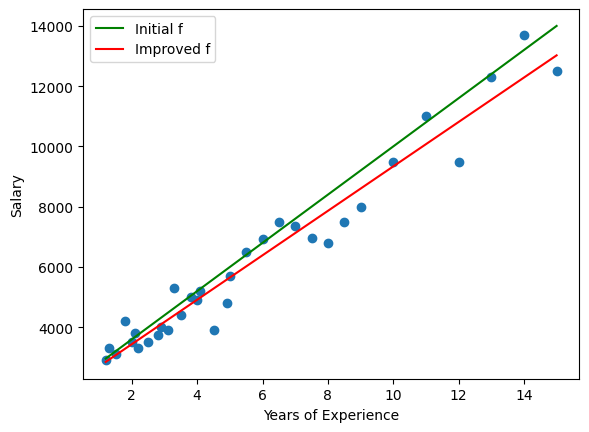

In [5]:
X = np.vectorize(float)(X)
plt.scatter(X, Y)
plt.plot(X, b_init + w_init * X, color='g', label="Initial f")
plt.plot(X, b + w * X, color='r', label="Improved f")
plt.legend()
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

The new function looks visually closer to the data points and the computations also confirmed it leads to better results (it approximates the data better).